<a href="https://colab.research.google.com/github/keertikayo/stone-paper-scissor-thumb-image-recognition/blob/main/stone_paper_scissor_thumb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)


from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob


IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/dataset/train'
valid_path = '/content/drive/MyDrive/dataset/test'

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

for layer in inception.layers:
    layer.trainable = False

folders = glob('/content/drive/MyDrive/dataset/train/*')
x = Flatten()(inception.output)

prediction = Dense(len(folders), activation='softmax')(x)

model = Model(inputs=inception.input, outputs=prediction)

#model.summary()

model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

from tensorflow.keras.preprocessing.image import ImageDataGenerator

#augmentation
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/dataset/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')
#training
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

87910968/87910968 [==============================] - 1s 0us/step
Found 784 images belonging to 4 classes.
Found 83 images belonging to 4 classes.


<ipython-input-1-3f51c5a224d1>:67: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/10
25/25 [==============================] - 350s 14s/step - loss: 5.2498 - accuracy: 0.6569 - val_loss: 6.5550 - val_accuracy: 0.5060
Epoch 2/10
25/25 [==============================] - 109s 4s/step - loss: 0.8013 - accuracy: 0.8941 - val_loss: 4.4853 - val_accuracy: 0.4819
Epoch 3/10
25/25 [==============================] - 112s 4s/step - loss: 0.3013 - accuracy: 0.9426 - val_loss: 3.8154 - val_accuracy: 0.5542
Epoch 4/10
25/25 [==============================] - 117s 5s/step - loss: 0.1389 - accuracy: 0.9796 - val_loss: 6.8102 - val_accuracy: 0.5181
Epoch 5/10
25/25 [==============================] - 109s 4s/step - loss: 0.0562 - accuracy: 0.9847 - val_loss: 7.9780 - val_accuracy: 0.4699
Epoch 6/10
25/25 [==============================] - 111s 4s/step - loss: 0.0776 - accuracy: 0.9821 - val_loss: 5.7345 - val_accuracy: 0.4940
Epoch 7/10
25/25 [==============================] - 109s 4s/step - loss: 0.1667 - accuracy: 0.9745 - val_loss: 6.0836 - val_accuracy: 0.4940
Epoch 8/10
2

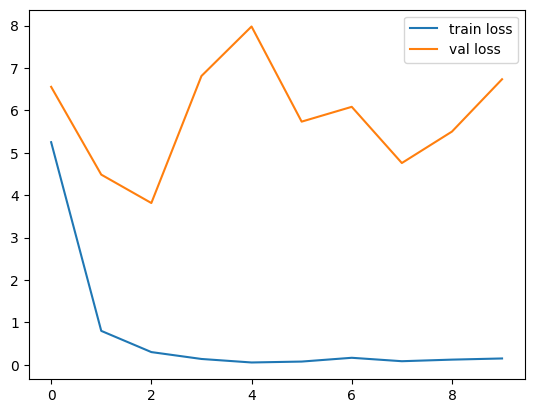

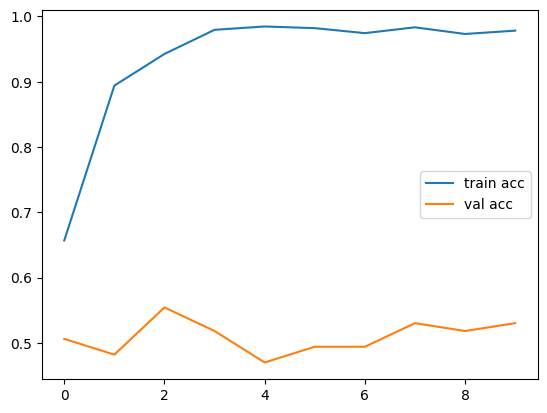

<Figure size 640x480 with 0 Axes>

In [2]:
import matplotlib.pyplot as plt

# graph plot
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')